In [10]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y
!pip install tensorflow-gpu==1.15
!pip install keras==2.0.8
!pip install h5py==2.10.0
import tensorflow
import keras
import skimage
print(tensorflow.__version__)
print(keras.__version__)
print(skimage.__version__)
!git clone https://github.com/robinjosephiit/Mask_RCNN_intermittency.git
!ls ./Mask_RCNN_intermittency
%cd ./Mask_RCNN_intermittency/Intermittency-transfer-learning/Intermittency
!ls
!ls ./images
!ls ./images -l . | egrep -c '^-' # Count the number of files in the directory. 
import skimage.io
import matplotlib.pyplot

Found existing installation: Keras 2.0.8
Uninstalling Keras-2.0.8:
  Successfully uninstalled Keras-2.0.8
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: h5py 2.10.0
Uninstalling h5py-2.10.0:
  Successfully uninstalled h5py-2.10.0
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached h5py-3.4.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.1 MB)


  Using cached Keras-2.0.8-py2.py3-none-any.whl (276 kB)


  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.4.0
    Uninstalling h5py-3.4.0:
      Successfully uninstalled h5py-3.4.0


1.15.0
2.0.8
0.16.2
Cloning into 'Mask_RCNN_intermittency'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 53 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (53/53), done.
Intermittency-transfer-learning  mrcnn		   setup.cfg
LICENSE				 mrcnn_directed    setup.py
MANIFEST.in			 README.md
MaskRCNN_robgit.ipynb		 requirements.txt
/content/Mask_RCNN_intermittency/Mask_RCNN_intermittency/Intermittency-transfer-learning/Intermittency
annots	images
00001.jpg  00003.jpg  00005.jpg  00007.jpg  00009.jpg  00011.jpg
00002.jpg  00004.jpg  00006.jpg  00008.jpg  00010.jpg  00012.jpg
12


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


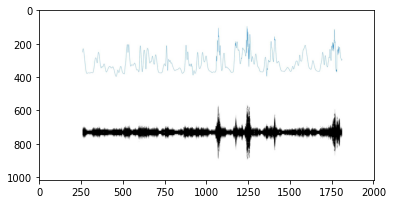

00001.xml  00003.xml  00005.xml  00007.xml  00009.xml  00011.xml
00002.xml  00004.xml  00006.xml  00008.xml  00010.xml  00012.xml
12
<annotation>
	<folder>Labelimg</folder>
	<filename>00001.jpg</filename>
	<path>E:/OneDrive - Indian Institute of Science/Codes/DL/Inter_calc/Labelimg/00001.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>2005</width>
		<height>1016</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>kangaroo</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1052</xmin>
			<ymin>571</ymin>
			<xmax>1099</xmax>
			<ymax>895</ymax>
		</bndbox>
	</object>
	<object>
		<name>kangaroo</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1168</xmin>
			<ymin>628</ymin>
			<xmax>1187</xmax>
			<ymax>843</ymax>
		</bndbox>
	</object>
	<object>
		<name>kangaroo</name>
		<pose>Unspecified</pose>
		<truncated>0</t

In [11]:
im_name = "00001"
img = skimage.io.imread("./images/" + im_name + ".jpg")
print(img)
matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()
!ls ./annots
!ls ./annots -l . | egrep -c '^-' # Count the number of files in the directory. 
import xml
im_name = "00001"
with open("./annots/" + im_name + ".xml") as f:
    print(f.read())
import skimage.io
import matplotlib.pyplot, matplotlib.patches

There are 4 objects in the image.
BBoxes: [[1052, 571, 1099, 895], [1168, 628, 1187, 843], [1233, 564, 1273, 896], [1744, 591, 1807, 871]]



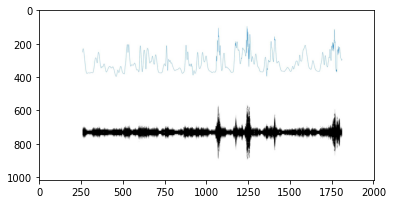

In [12]:
def extract_boxes(filename):
    tree = xml.etree.ElementTree.parse(filename)
    root = tree.getroot()
    boxes = list()
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        coors = [xmin, ymin, xmax, ymax]
        boxes.append(coors)
    return boxes

im_name = "00001"
img = skimage.io.imread("./images/" + im_name + ".jpg")
boxes = extract_boxes("./annots/" + im_name + ".xml")
print("There are {count} objects in the image.".format(count=len(boxes)))
print("BBoxes:", boxes, end="\n\n")
fig, ax = matplotlib.pyplot.subplots()
ax.imshow(img)

In [13]:
for box_idx in range(len(boxes)):
    rect = matplotlib.patches.Rectangle((boxes[box_idx][0], boxes[box_idx][1]), 
                                        boxes[box_idx][2]-boxes[box_idx][0], boxes[box_idx][3]-boxes[box_idx][1], 
                                        linewidth=5, 
                                        edgecolor='r', 
                                        facecolor='none')
    ax.add_patch(rect)
matplotlib.pyplot.show()
%cd ../..

/content/Mask_RCNN_intermittency/Mask_RCNN_intermittency


In [14]:
import os
import xml.etree
from numpy import zeros, asarray

import mrcnn
import mrcnn.utils
import mrcnn.config
import mrcnn.model

class IntermittencyDataset(mrcnn.utils.Dataset):

    def load_dataset(self, dataset_dir, is_train=True):
        self.add_class("dataset", 1, "spot")
        images_dir = dataset_dir + '/images/'
        annotations_dir = dataset_dir + '/annots/'

        for filename in os.listdir(images_dir):
            image_id = filename[:-4]

            if is_train and int(image_id) >= 40:
                continue

            if not is_train and int(image_id) < 40:
                continue

            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'

            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path)

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        path = info['annotation']
        boxes, w, h = self.extract_boxes(path)
        masks = zeros([h, w, len(boxes)], dtype='uint8')

        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('spot'))
        return masks, asarray(class_ids, dtype='int32')

    # A helper method to extract the bounding boxes from the annotation file
    def extract_boxes(self, filename):
        tree = xml.etree.ElementTree.parse(filename)
        root = tree.getroot()
        boxes = list()
        for box in root.findall('.//bndbox'):
            xmin = int(box.find('xmin').text)
            ymin = int(box.find('ymin').text)
            xmax = int(box.find('xmax').text)
            ymax = int(box.find('ymax').text)
            coors = [xmin, ymin, xmax, ymax]
            boxes.append(coors)
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

In [15]:
train_dataset = IntermittencyDataset()
train_dataset.load_dataset(dataset_dir='./Intermittency-transfer-learning/Intermittency', is_train=True)
train_dataset.prepare()

In [16]:
# Validation
validation_dataset = IntermittencyDataset()
validation_dataset.load_dataset(dataset_dir='./Intermittency-transfer-learning/Intermittency', is_train=False)
validation_dataset.prepare()
class IntermittencyConfig(mrcnn.config.Config):
    NAME = "spot_cfg"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 2
    
    LEARNING_RATE = 0.001

    STEPS_PER_EPOCH = 131
spot_config = IntermittencyConfig()
model = mrcnn.model.MaskRCNN(mode='training', 
                             model_dir='./log', 
                             config=spot_config)
model.keras_model.summary()
import urllib.request

urllib.request.urlretrieve("https://github.com/matterport/Mask_RCNN/releases/download/v1.0/mask_rcnn_coco.h5", "mask_rcnn_coco.h5")
model.load_weights(filepath='mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
print("Weights loaded!")

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_image (InputLayer)         (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D) (None, None, None, 3) 0           input_image[0][0]                
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, None, None, 64 9472        zero_padding2d_2[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNorm)             (None, None, None, 64 256         conv1[0][0]                      
___________________________________________________________________________________________

In [8]:
model.train(train_dataset=train_dataset, 
            val_dataset=validation_dataset, 
            learning_rate=spot_config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')
model_path = 'spot_mask_rcnn_trained.h5'
model.keras_model.save_weights(model_path)
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os

CLASS_NAMES = ['BG', 'spot']

class SimpleConfig(mrcnn.config.Config):
    NAME = "coco_inference"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

model.load_weights(filepath="spot_mask_rcnn_trained.h5", 
                   by_name=True)

KeyboardInterrupt: ignored

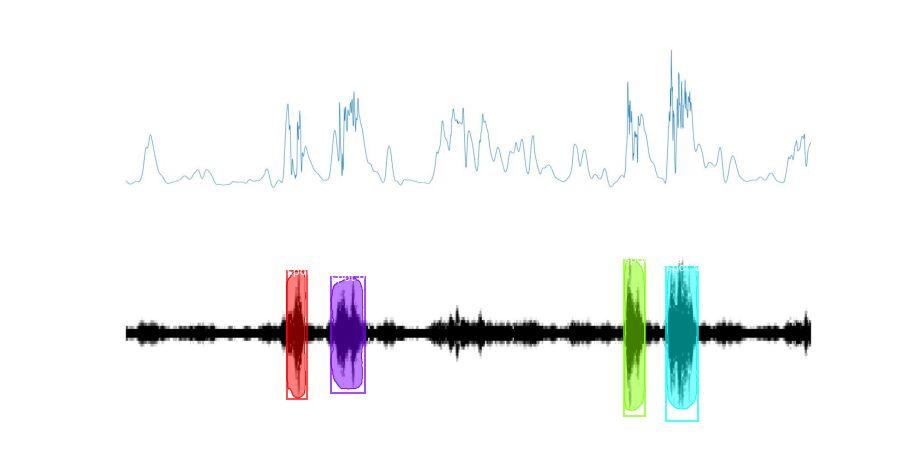

[0.9892511  0.987912   0.98647135 0.87304705]


In [ ]:
image = cv2.imread("./Intermittency-transfer-learning/Intermittency/test_unseen/00084.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = model.detect([image], verbose=0)

r = r[0]

mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])
print(r['scores'])